ЛАБА 3

совместга ли здача

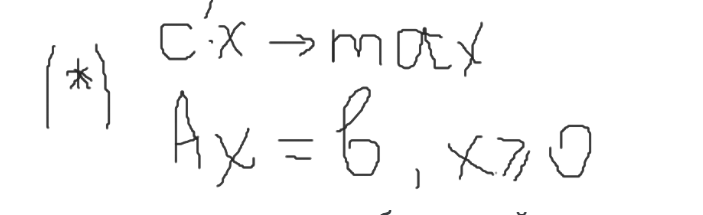

если совместна то начальный базисный план

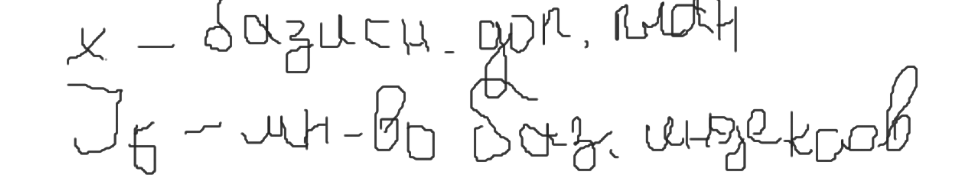

![image.png]

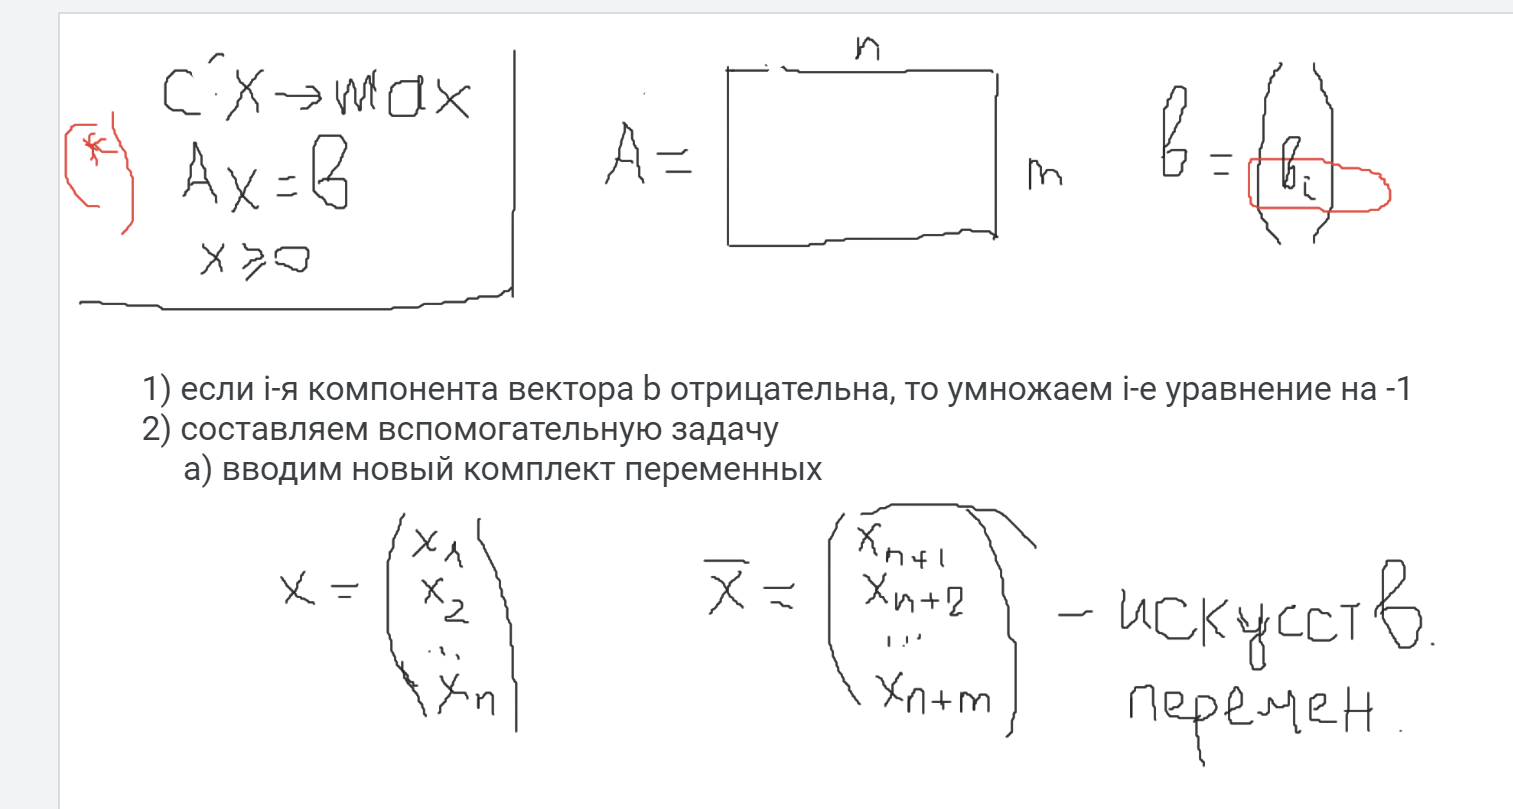

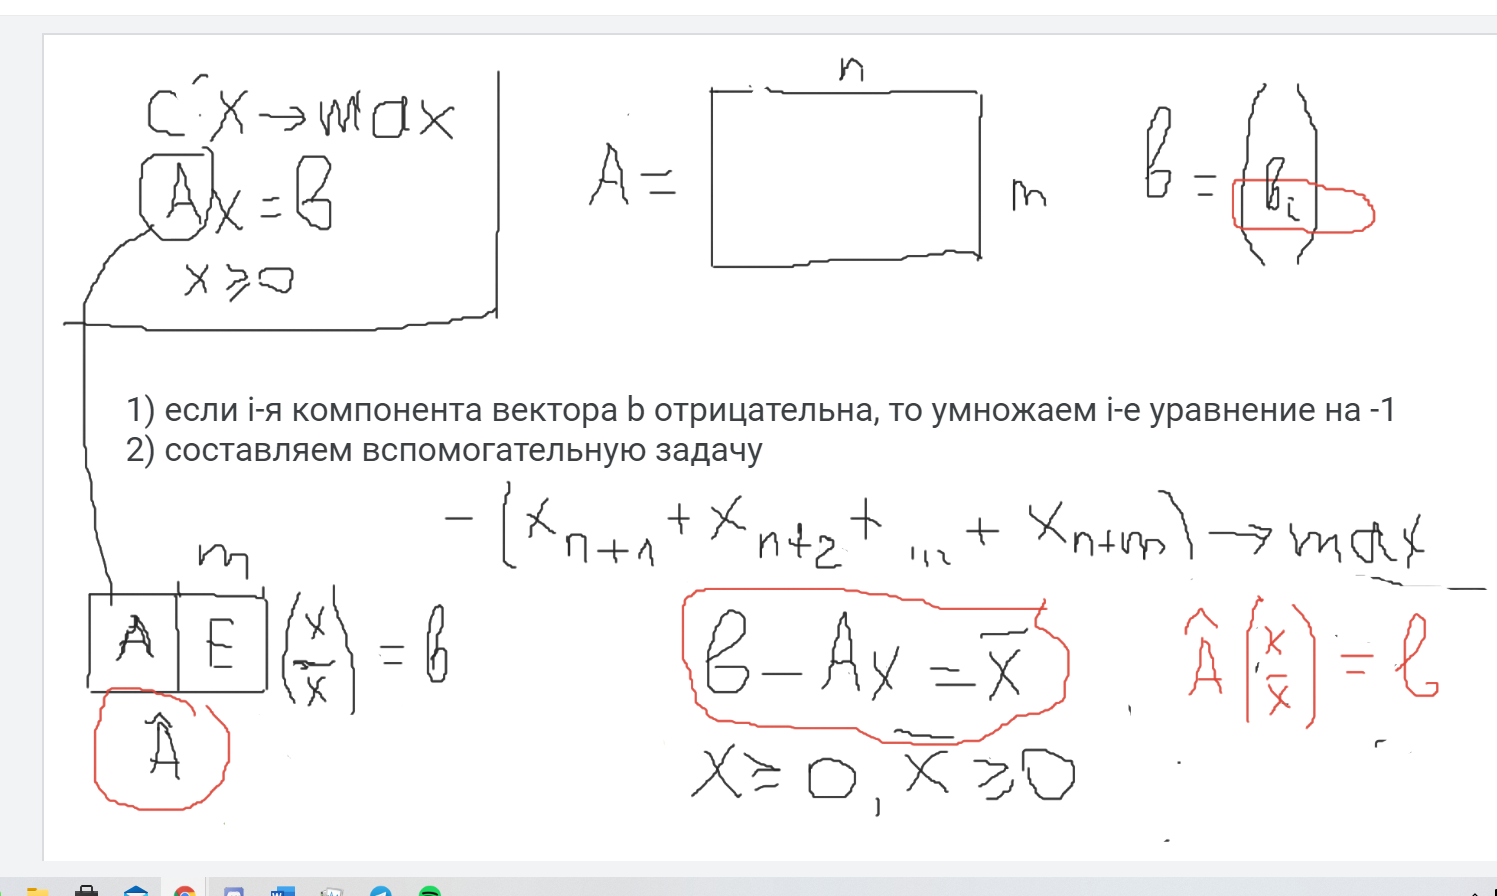

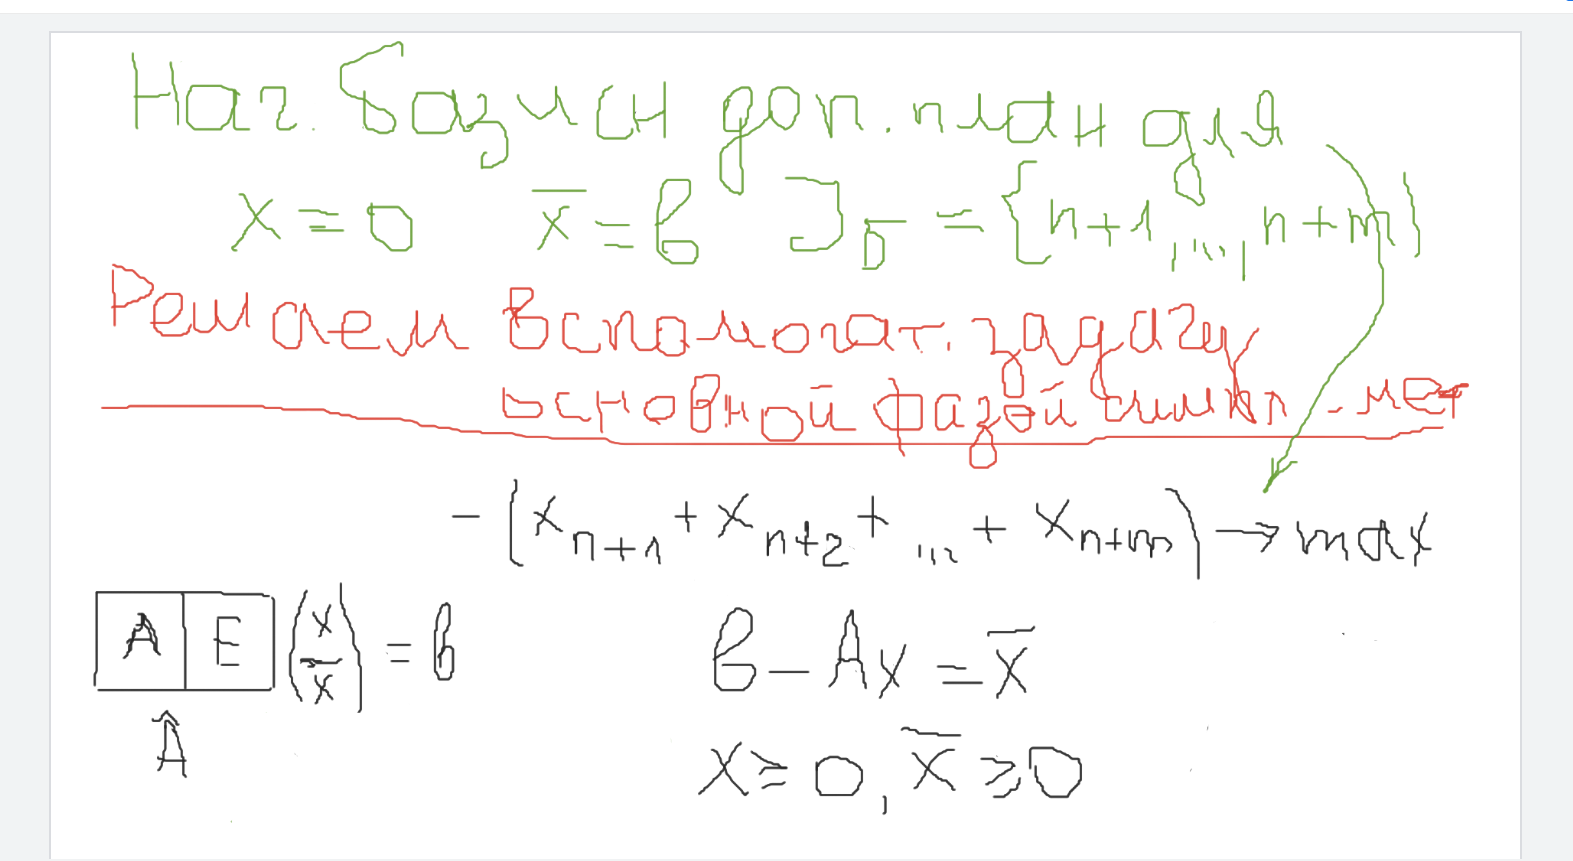

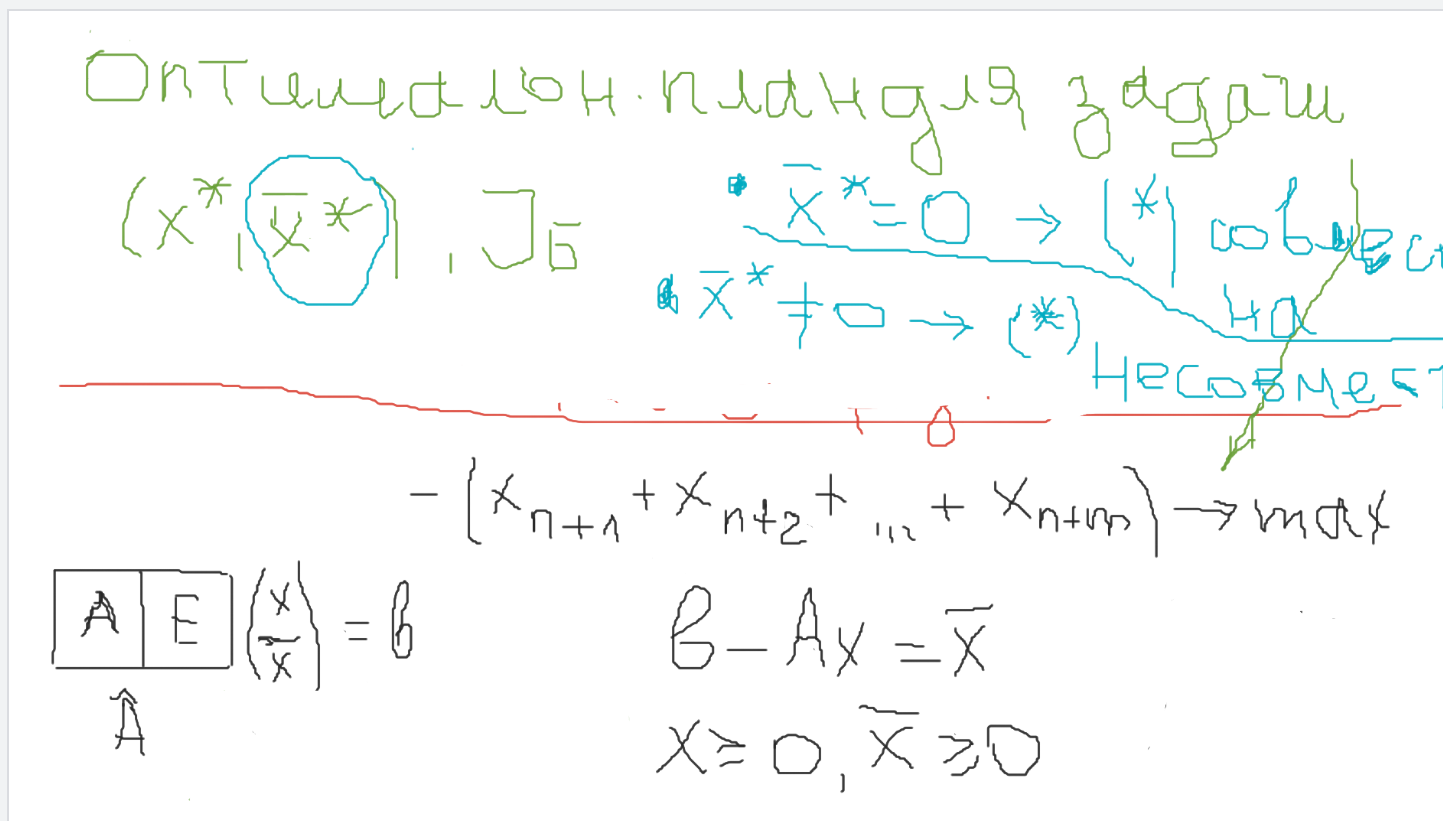

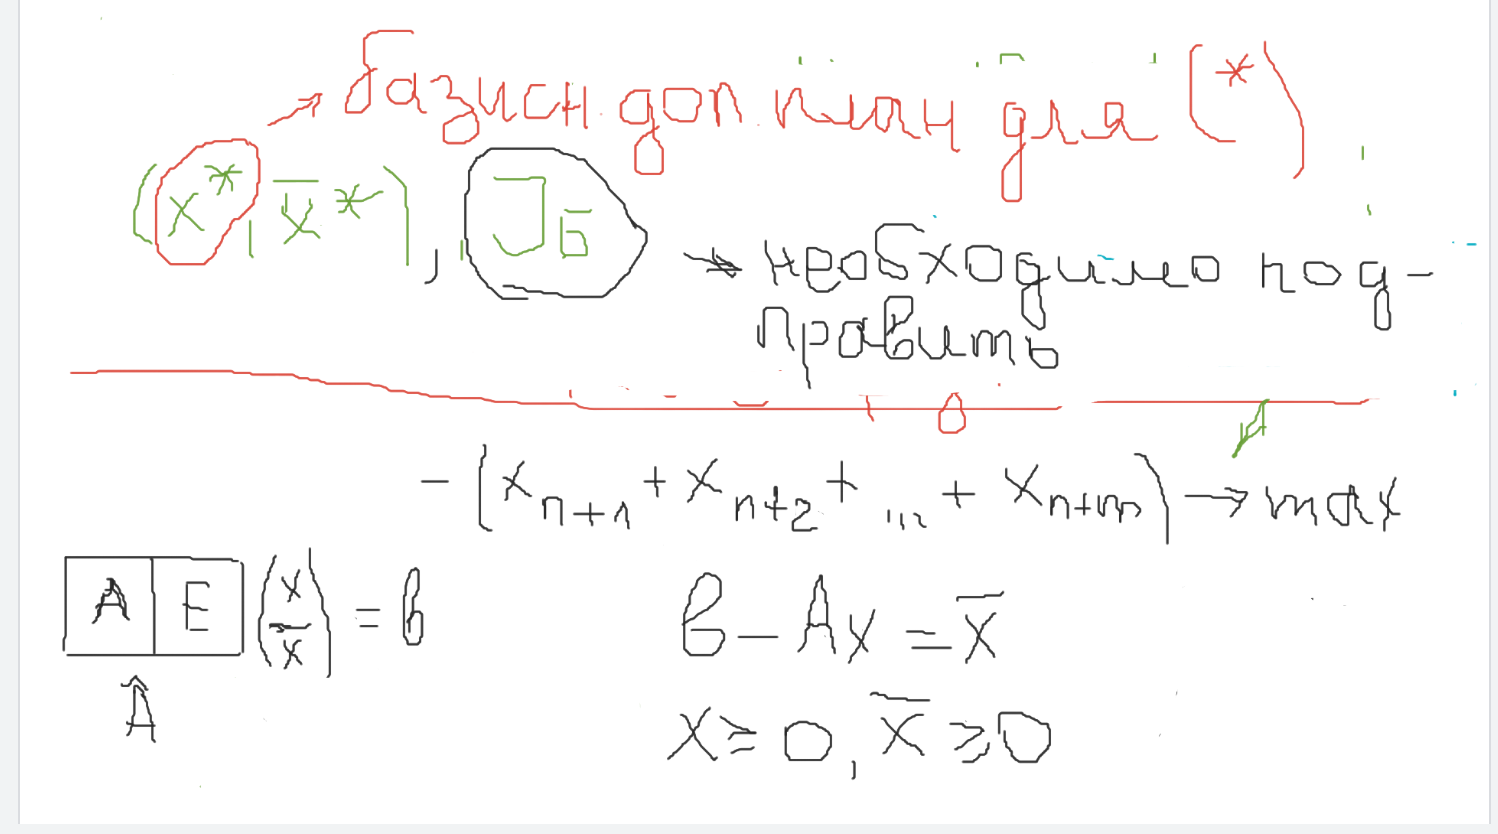

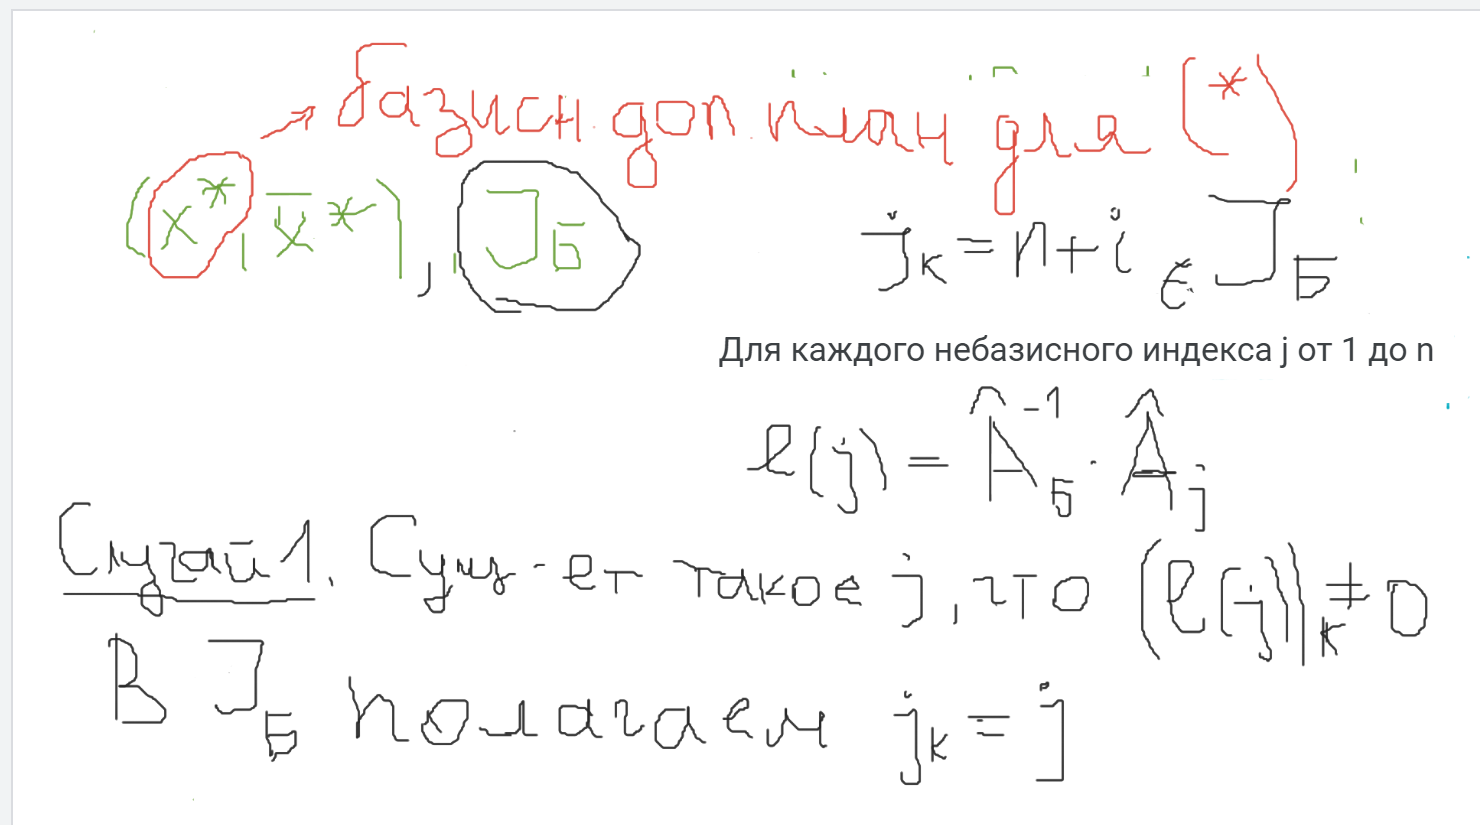

выбираем любой индекс любой который не удовлетворяет пусть каый по счету

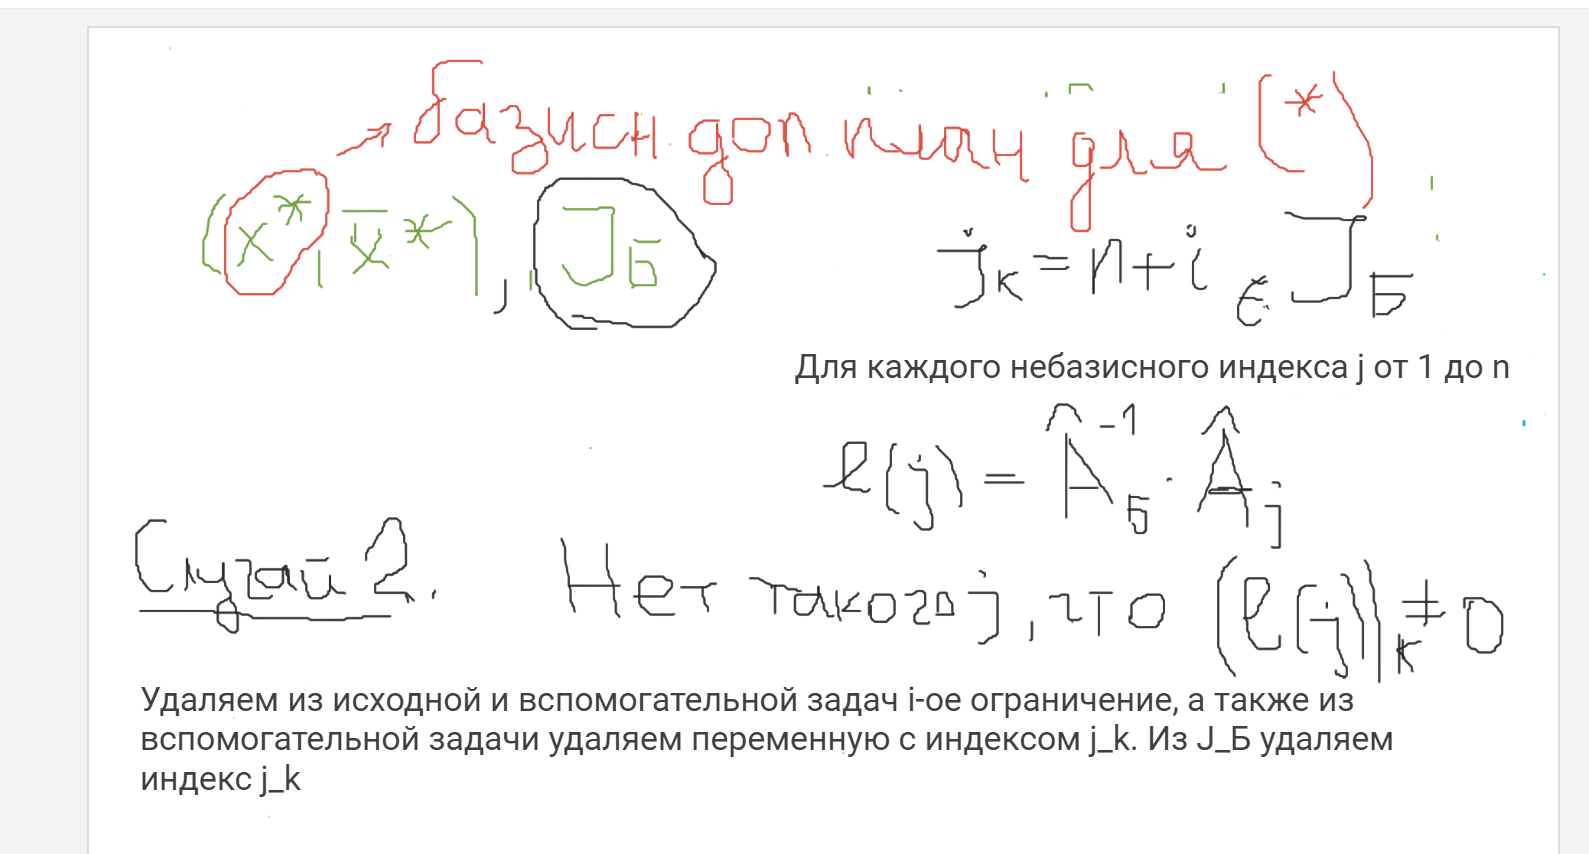

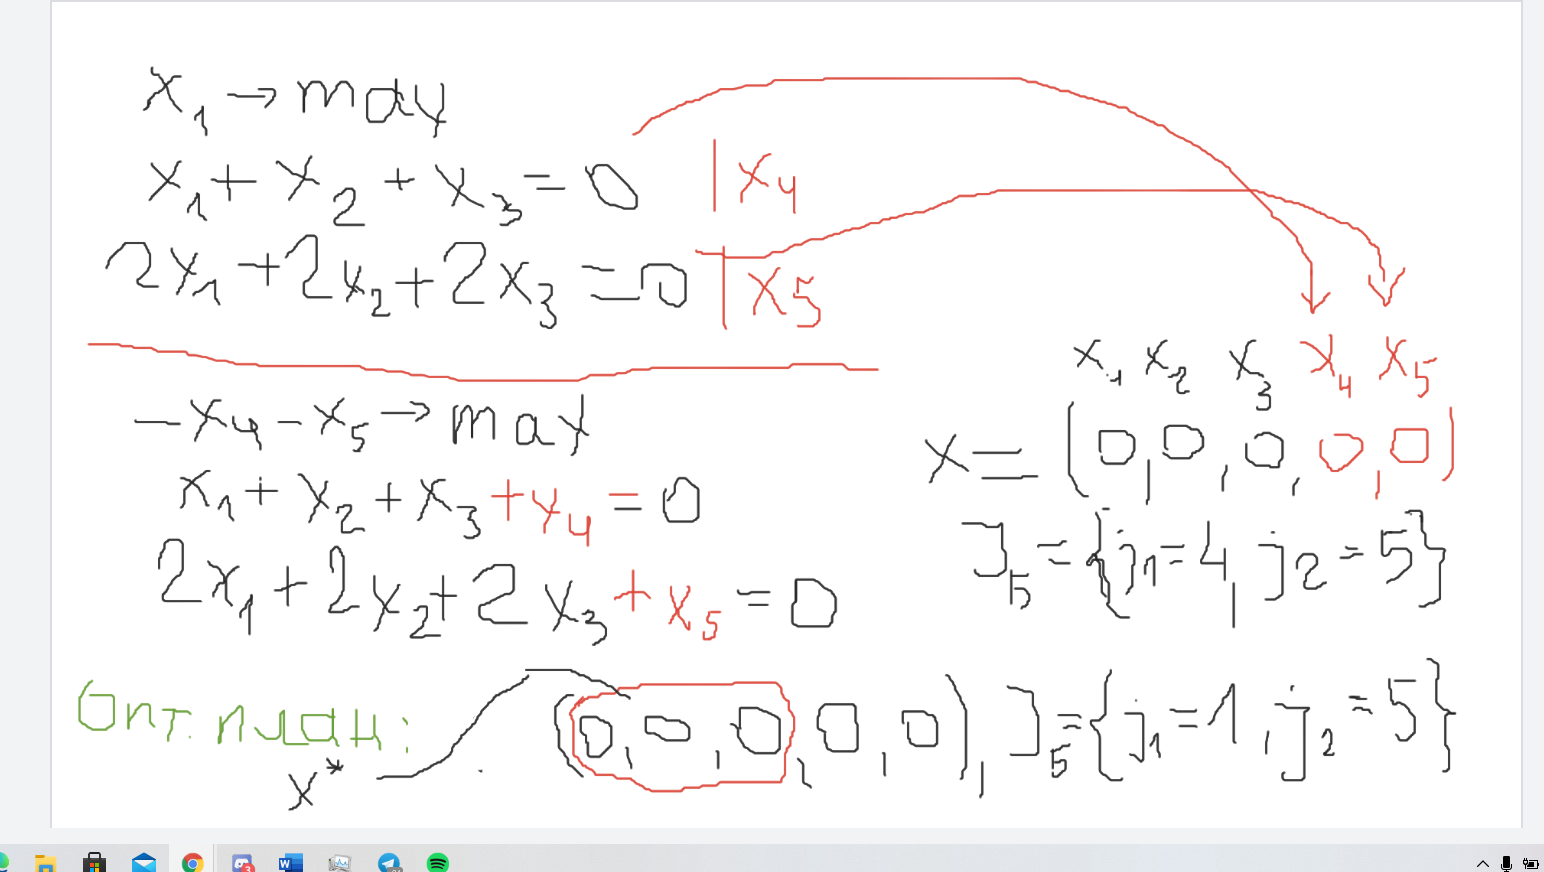

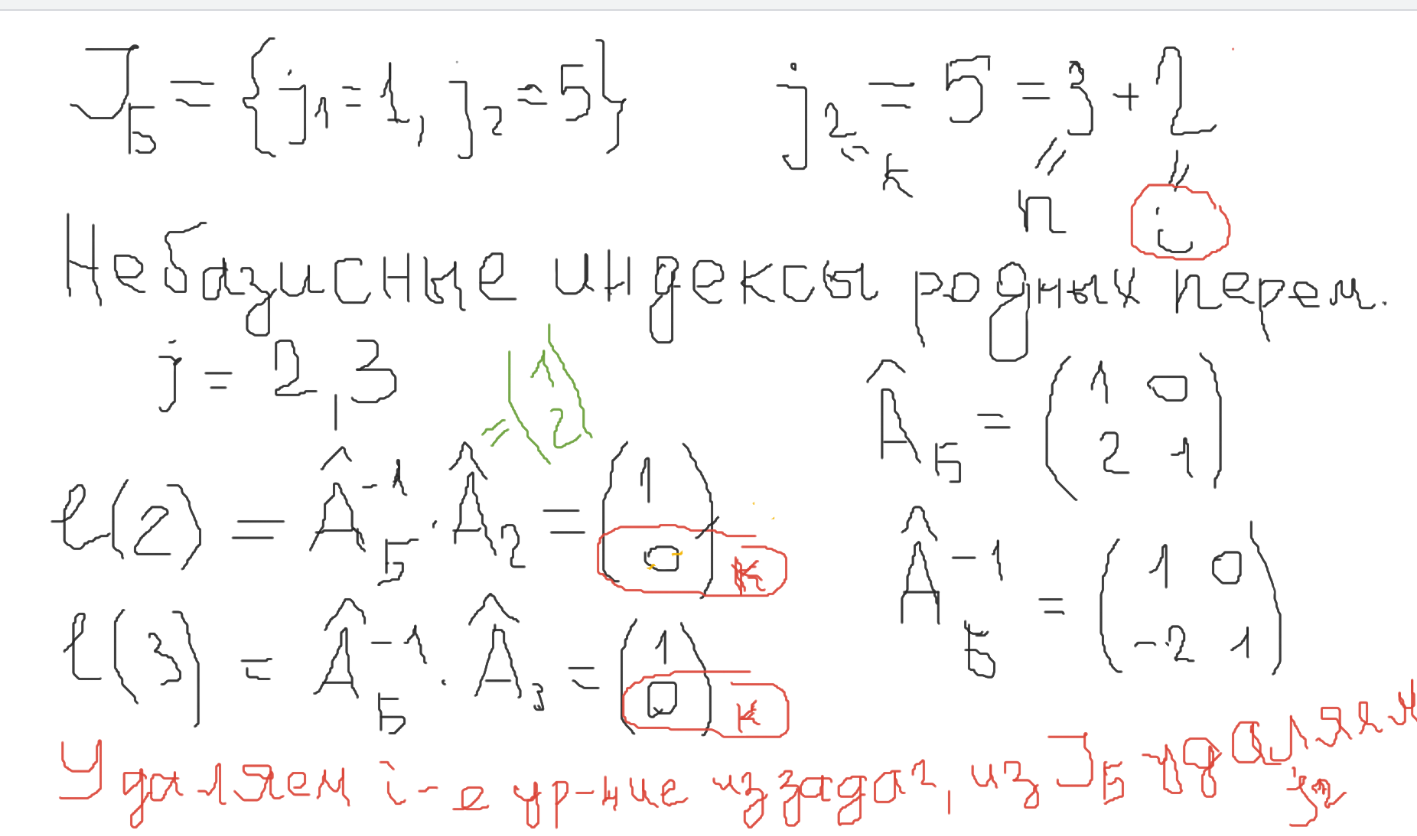

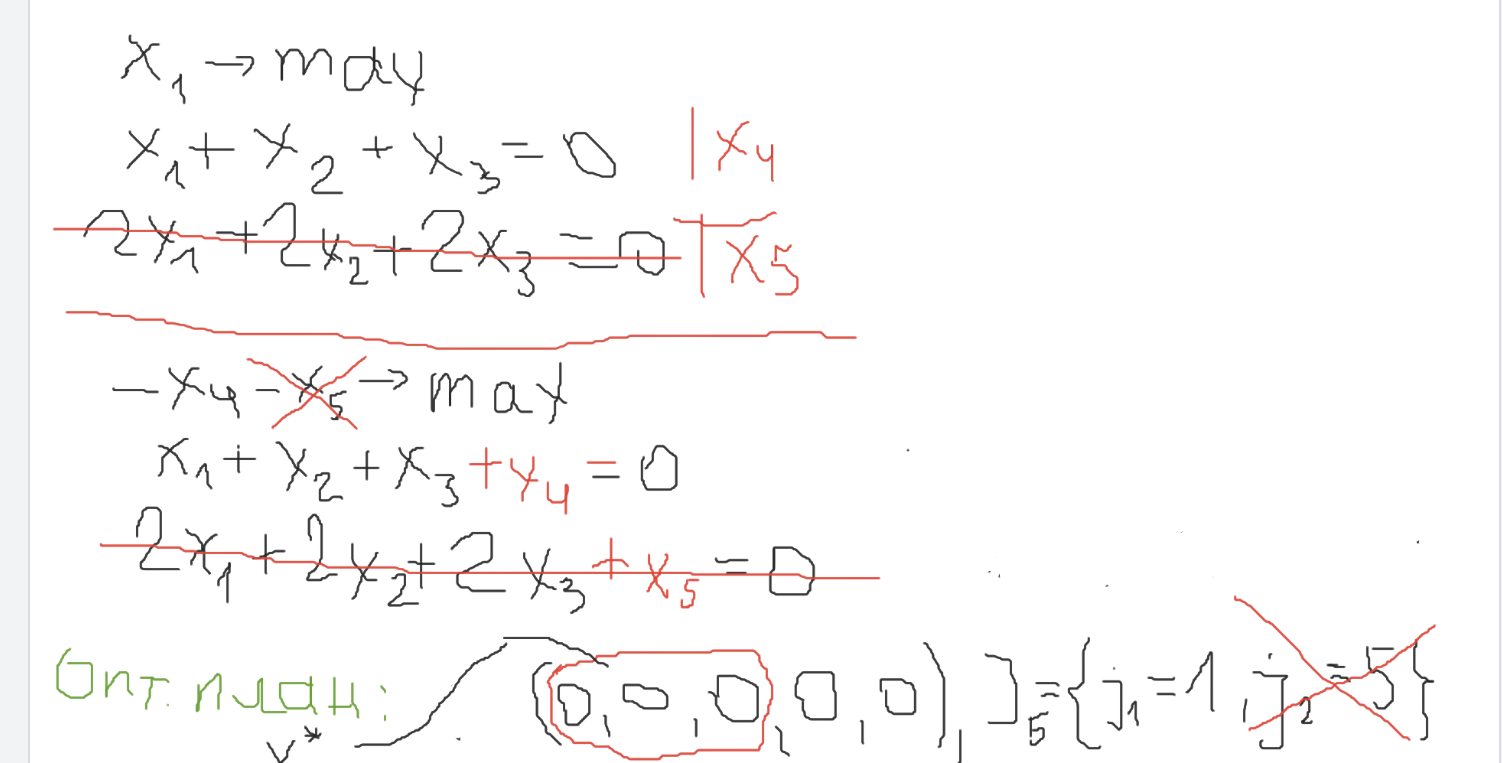

In [ ]:
def get_matrix(av, Jb):
  a = np.eye(len(Jb))
  j = 0
  for i in Jb:
    a[:, j] = av[:, i - 1]
    j += 1
  a = np.linalg.inv(a)
  return a

In [ ]:
A = np.array([[-1, 1, 1, 0, 0], [1, 1, 0, 1, 0], [0, -1, 0, 0, 2]])
b = np.array([2, 6, -4.5])
begin_simplex(A, b)

'Несовместна'

In [ ]:
A = np.array([[-1, 5, 1, 0], [5, 1, 0, 1], [4, 6, 1, 1]])
b = np.array([20, 30, 50])
begin_simplex(A, b)

array([5., 5., 0., 0.])

In [ ]:
A = np.array([[-1, 1, 1, 0], [4, 5, 0, 1], [10, 17, 2, 3]])
b = np.array([2, 28, 88])
begin_simplex(A, b)

[2. 4. 0. 0. 0. 0. 0.] [2 1 7]
2
[3, 4]
3 [ 4.44444444e-01 -5.55555556e-01  8.88178420e-16]
4 [0.11111111 0.11111111 0.        ]
[2 1 7]


array([2., 4., 0., 0.])

In [ ]:
import numpy as np

def begin_simplex(A, b):
  n = len(A[0])
  m = len(b)
  for i in range(m):
    if b[i] < 0:
      b[i] *= -1
      A[i] *= -1
  E = np.eye(m)
  Av = np.empty([m, n + m])
  for i in range(m):
    Av[i] = np.append(A[i], E[i])
  
  x = np.append(np.zeros(n), b)
  
  Jb = np.array([n + i + 1 for i in range(m)])
  c = [0 if i < n else -1 for i in range(n + m)]
  x, jb = main_simplex(Av, c, x, Jb)
  print(x,jb)
  for i in x[n:]:
    if abs(i) > 10 ** -6:
      return 'Несовместна'
  while True:
    k = -1
    for i in range(len(jb)):
      if (jb[i] > n):
        k = i
    if k == -1:
      return x[:n]
      break
    print(k)
    jnb = []
    for i in range(1, n + 1):
      if not i in jb:
        jnb.append(i)
    print(jnb)
    avb_inv = get_matrix(Av, jb)
    flag = False
    for i in jnb:
      l = np.dot(avb_inv, Av[:,i - 1])
      print(i, l)
      if abs(l[k]) < 10 ** -6:
        jb[k] = i
        flag = True
        break
    print(jb)
    if not flag:
      c = c[:-1]
      jb = jb[:-1]
      A = A[:-1]
      Av = Av[:-1]
      b = b[:-1]



In [ ]:
def solve(A_inv, x, k):
  n = len(A_inv)
  k -= 1 # для лучшей индексации
  # ШАГ 1
  l = np.dot(A_inv, x)
  li = l[k] # находим i-ую компоненту вектора l
  if (li == 0): # проверка компоненты на равенство нолю
    return "Матрица не может быть обратимой"
  # ШАГ 2
  l1 = np.copy(l) # получаем вектор l с волной
  l1[k] = -1 # заменяем i-ую компоненту вектора l с волной -1
  # ШАГ 3
  l2 = np.dot(-1/li, l1) # получаем вектор l с шапочкой
  # ШАГ 4
  E = np.eye(n) # создаем единичную матрицу
  Q = np.copy(E)
  #print(l2)
  Q[:,k] = l2.transpose() # создаем матрицу Q
  z = np.eye(n)
  for i in range(n):
    for j in range(n):
      z[i][j] = Q[i][i]*A_inv[i][j]
      if (i != k):
        z[i][j] += Q[i][k]*A_inv[k][j]
  return z

In [ ]:
def main_simplex(A, c, x, jb):
  iteration = 0
  while True:
    iteration += 1
    if iteration == 1:
      ab = np.array([np.copy(A[:,i-1]) for i in jb]).transpose()
      A_i = np.linalg.inv(ab)
    else:
      ab[:,position_min_tetta] = A[:, jb[position_min_tetta] - 1]
      A_i = solve(A_i, ab[:,position_min_tetta], position_min_tetta + 1)
    cb = np.array([c[i - 1] for i in jb])
    u = np.dot(cb, A_i)
    delta = np.dot(u, A) -c
    j0=0
    if min(delta) >= 0:
      
      return (x, jb)
    while delta[j0]>=0:
      j0 += 1
    z = np.dot(A_i, A[:,j0])
    tetta = [float(x[jb[i] - 1])/float(z[i]) if z[i]> 0 else np.inf for i in range(len(jb))]
    tetta0 = np.min(tetta)
    if tetta0 is np.inf:
      print("целевая функция неограничена на множестве допустимых планов")
    position_min_tetta = np.where(tetta == tetta0)[0][0]
    jb_new = np.copy(jb)
    jb_new[position_min_tetta] = j0 + 1
    x_new = np.copy(x)
    j = 0
    x_new = x_new.astype(np.float64)
    for i in jb:
      x_new[i - 1] = float(x[i - 1]) - tetta0*float(z[j])
      j+=1
    x_new[j0] = tetta0
    x = x_new
    jb = jb_new
    
